<a href="https://colab.research.google.com/github/Gurmel899/projek_rn/blob/master/backup_skripsi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install pandas numpy statsmodels scikit-learn


In [3]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.0 MB/s eta 0:00:00


In [4]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import pmdarima as pm
from pmdarima.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import acf, pacf
from matplotlib.dates import DateFormatter, MonthLocator, YearLocator
import math



In [5]:
# Baca data dari file CSV dan ubah format tanggal
file_path = '/content/BBCA.JK22222.csv'
data = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')


# Tentukan data training dan testing sesuai dengan tahun
train_data = data['2018-01-01':'2021-12-31']
test_data = data['2022-01-01':]
print(data)

            Close
Date             
2018-01-01   4380
2018-01-02   4380
2018-01-03   4380
2018-01-04   4445
2018-01-05   4450
...           ...
2022-12-26   8575
2022-12-27   8600
2022-12-28   8650
2022-12-29   8575
2022-12-30   8550

[1254 rows x 1 columns]


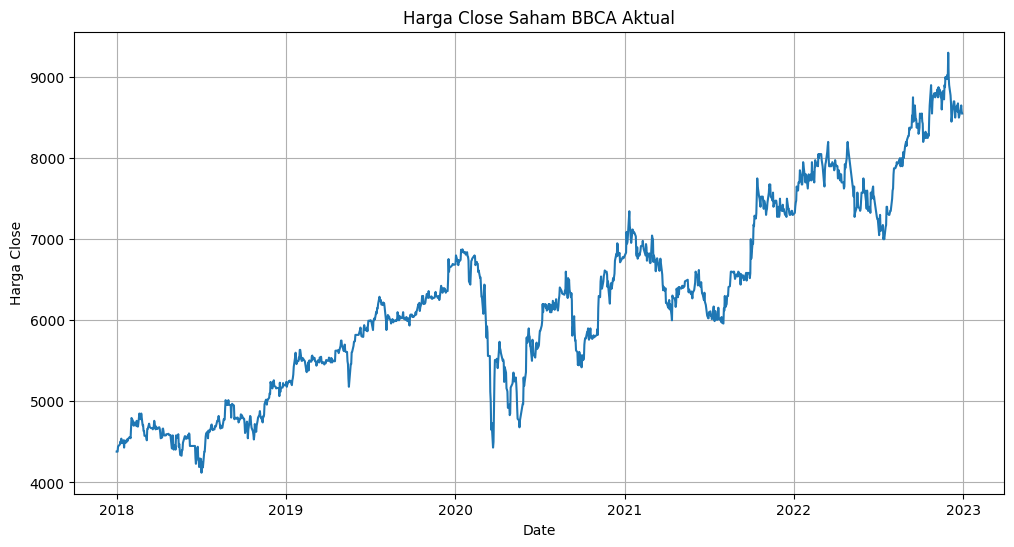

In [6]:
# melakukan fungsi penguraian data
dateparse = lambda dates: pd.to_datetime(dates, format='%m/%d/%Y')

# Example: Read CSV with correct date parsing
data = pd.read_csv('/content/BBCA.JK22222.csv', sep=',', index_col='Date', parse_dates=['Date'], date_parser=dateparse).fillna(0)

#plot harga close
plt.figure(figsize=(12,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Harga Close')
plt.plot(data['Close'])
plt.title('Harga Close Saham BBCA Aktual')
plt.show()

In [7]:
# Tentukan data training dan testing
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

# Display the output
print("Training Data:")
print(train_data)
#data train dari 2018-2021

print("\nTesting Data:")
print(test_data)
#data train dari 2022


Training Data:
            Close
Date             
2018-01-01   4380
2018-01-02   4380
2018-01-03   4380
2018-01-04   4445
2018-01-05   4450
...           ...
2021-12-17   7500
2021-12-20   7375
2021-12-21   7375
2021-12-22   7325
2021-12-23   7300

[1003 rows x 1 columns]

Testing Data:
            Close
Date             
2021-12-24   7300
2021-12-27   7350
2021-12-28   7350
2021-12-29   7300
2021-12-30   7300
...           ...
2022-12-26   8575
2022-12-27   8600
2022-12-28   8650
2022-12-29   8575
2022-12-30   8550

[251 rows x 1 columns]


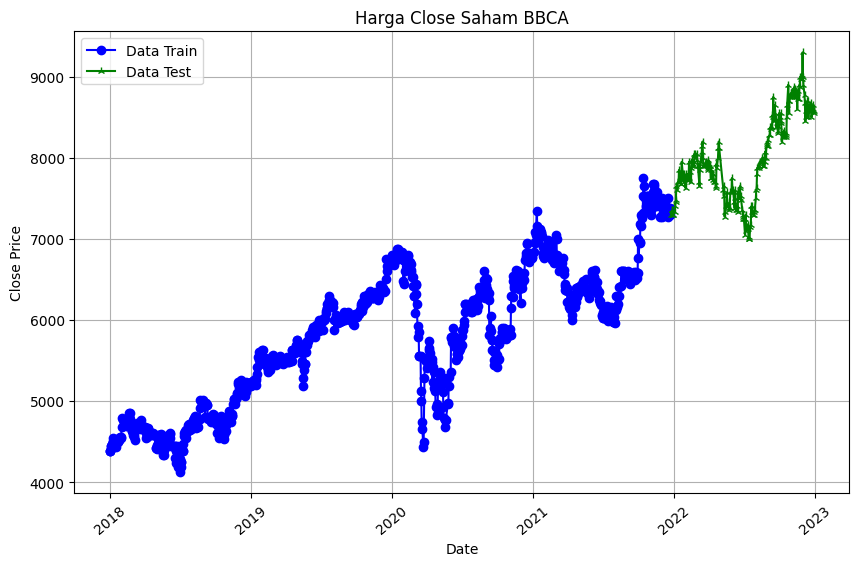

In [8]:


# Example data parsing function
dateparse = lambda dates: pd.to_datetime(dates, format='%m/%d/%Y')

# Example: Read CSV with correct date parsing
file_path = '/content/BBCA.JK22222.csv'
data = pd.read_csv(file_path, sep=',', index_col='Date', parse_dates=['Date'], date_parser=dateparse).fillna(0)

# Split data into train and test (replace this with your actual split)
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]


# Plotting
plt.figure(figsize=(10, 6))

# Plot training data
plt.plot(train_data.index, train_data['Close'], label='Data Train', marker='o', color='blue')

# Plot testing data
plt.plot(test_data.index, test_data['Close'], label='Data Test', marker='2', color='green')


# Add title and axis labels
plt.title('Harga Close Saham BBCA')
plt.xlabel('Date')
plt.ylabel('Close Price')

# Add grid
plt.grid(True)

# Add legend
plt.legend()

# Rotate date labels to avoid overlap
plt.xticks(rotation=40)

plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


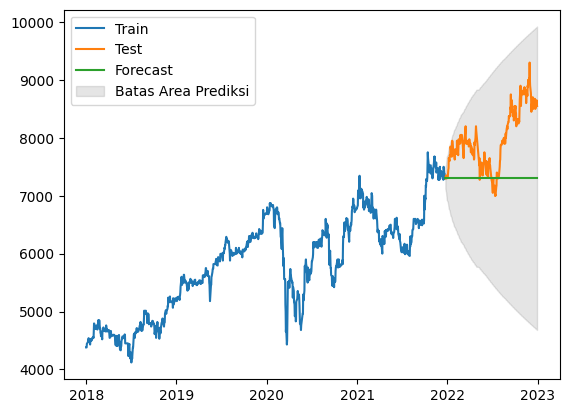

In [9]:
# Example data parsing function
dateparse = lambda dates: pd.to_datetime(dates, format='%m/%d/%Y')

# Example: Read CSV with correct date parsing
file_path = '/content/BBCA.JK22222.csv'
data = pd.read_csv(file_path, sep=',', index_col='Date', parse_dates=['Date'], date_parser=dateparse).fillna(0)



# Assuming you have a single-column time series named 'Close' in your DataFrame
y = data['Close']

# Split the data into train and test sets
train_data, test_data = train_test_split(y, train_size=0.8)

# Fit the ARIMA model
arima_model = pm.auto_arima(train_data, suppress_warnings=True)
arima_forecast, conf_int = arima_model.predict(n_periods=len(test_data), return_conf_int=True)

# Plotting with the fit line
plt.plot(y.index[:-len(test_data)], train_data, label='Train')
plt.plot(y.index[-len(test_data):], test_data, label='Test')
plt.plot(y.index[-len(test_data):], arima_forecast, label='Forecast')
plt.fill_between(y.index[-len(test_data):], conf_int[:, 0], conf_int[:, 1], color='k', alpha=0.1, label='Batas Area Prediksi')
plt.legend()
plt.show()


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=11901.563, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=11897.525, Time=0.33 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=11897.305, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=11900.576, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=11899.280, Time=0.61 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=11899.197, Time=0.90 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=11899.241, Time=2.12 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=11896.505, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=11898.480, Time=0.14 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=11898.448, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=11896.710, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=11898.523, Time=0.23 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 5.032 seconds
                               SARIMAX Results                              

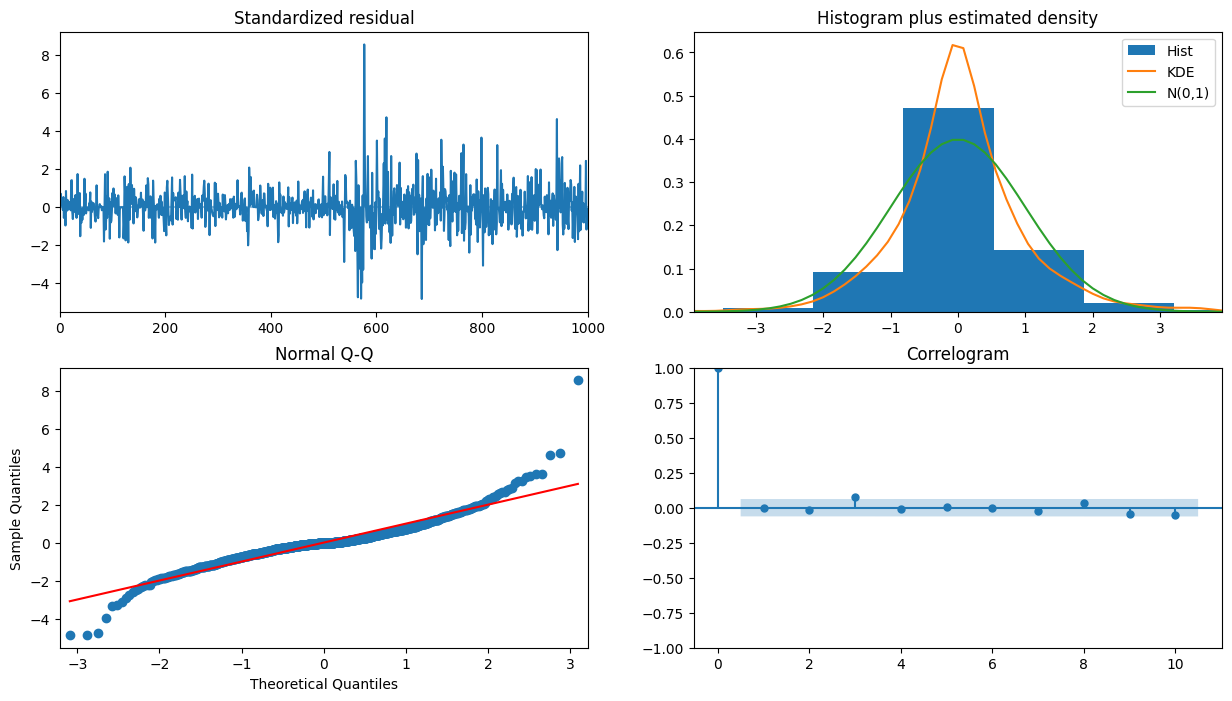

In [10]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   # No Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [11]:

# Baca data dari file CSV
file_path = '/content/BBCA.JK22222.csv'
data = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')

# # Tentukan data training dan testing
# train_size = int(len(data) * 0.8)
# train_data, test_data = data[:train_size], data[train_size:]



# Tentukan data training dan testing
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

# Fungsi untuk menghitung MAPE
def calculate_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

# Fungsi untuk melakukan prediksi ARIMA
def arima_prediction(train, test, order):
    history = [x for x in train['Close']]
    predictions = []

    for i in range(len(test)):
        model = ARIMA(history, order=order)
        model_fit = model.fit()
        pred = model_fit.forecast()[0]
        predictions.append(pred)
        history.append(test['Close'].iloc[i])

    return predictions

# Pilih parameter ARIMA (p, d, q) berdasarkan hasil di atas
order = (0, 1, 1)

# Lakukan prediksi ARIMA
predictions = arima_prediction(train_data, test_data, order)

# Hitung MAPE
mape = calculate_mape(test_data['Close'], predictions)

# Tampilkan hasil
print(f'MAPE: {mape:.2f}%')

# Simpan hasil prediksi ke file CSV
result_df = pd.DataFrame({'Date': test_data.index, 'Actual': test_data['Close'], 'Predicted': predictions})
result_df.to_csv('arima_predictions.csv', index=False)

# Display the complete calculation
result_df['Absolute Error'] = abs(result_df['Actual'] - result_df['Predicted'])
result_df['APE'] = result_df['Absolute Error'] / result_df['Actual'] * 100

print("\nComplete MAPE calculation for each data point:")
print(result_df[['Date', 'Actual', 'Predicted', 'Absolute Error', 'APE']])



MAPE: 1.06%

Complete MAPE calculation for each data point:
                 Date  Actual    Predicted  Absolute Error       APE
Date                                                                
2021-12-24 2021-12-24    7300  7302.280611        2.280611  0.031241
2021-12-27 2021-12-27    7350  7300.179392       49.820608  0.677831
2021-12-28 2021-12-28    7350  7346.079202        3.920798  0.053344
2021-12-29 2021-12-29    7300  7349.691618       49.691618  0.680707
2021-12-30 2021-12-30    7300  7303.911732        3.911732  0.053585
...               ...     ...          ...             ...       ...
2022-12-26 2022-12-26    8575  8508.986032       66.013968  0.769842
2022-12-27 2022-12-27    8600  8567.957704       32.042296  0.372585
2022-12-28 2022-12-28    8650  8596.584963       53.415037  0.617515
2022-12-29 2022-12-29    8575  8644.315901       69.315901  0.808349
2022-12-30 2022-12-30    8550  8582.398699       32.398699  0.378932

[251 rows x 5 columns]


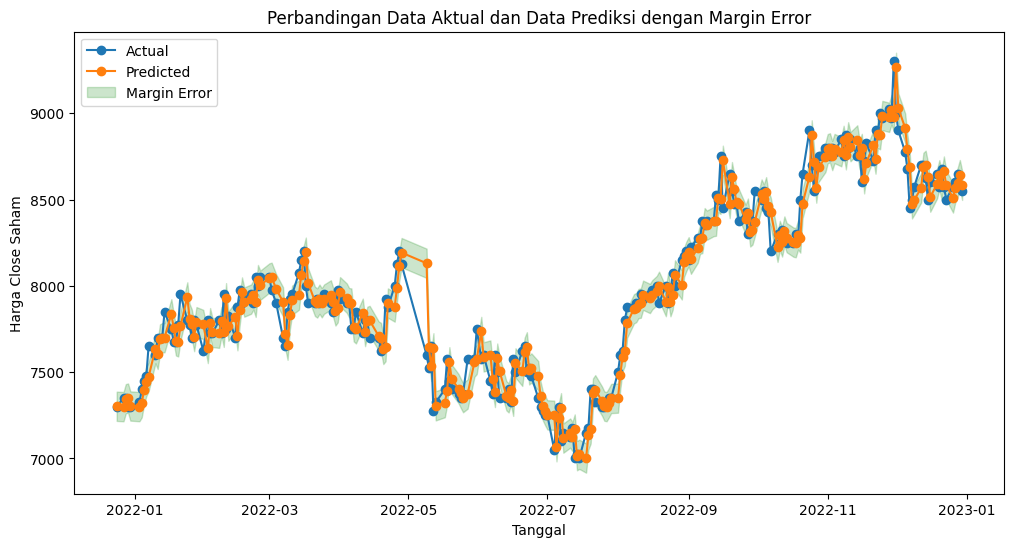

In [12]:
# Plot data aktual dan data prediksi dengan area margin error
plt.figure(figsize=(12, 6))
plt.plot(result_df['Date'], result_df['Actual'], label='Actual', marker='o')
plt.plot(result_df['Date'], result_df['Predicted'], label='Predicted', marker='o')

# Hitung upper dan lower bound untuk area margin error
margin_error = result_df['Absolute Error'].mean()
upper_bound = result_df['Predicted'] + margin_error
lower_bound = result_df['Predicted'] - margin_error

# Tambahkan area margin error ke plot
plt.fill_between(result_df['Date'], lower_bound, upper_bound, color='green', alpha=0.2, label='Margin Error')

# Konfigurasi tambahan untuk plot
plt.title('Perbandingan Data Aktual dan Data Prediksi dengan Margin Error')
plt.xlabel('Tanggal')
plt.ylabel('Harga Close Saham')
plt.legend()
plt.show()


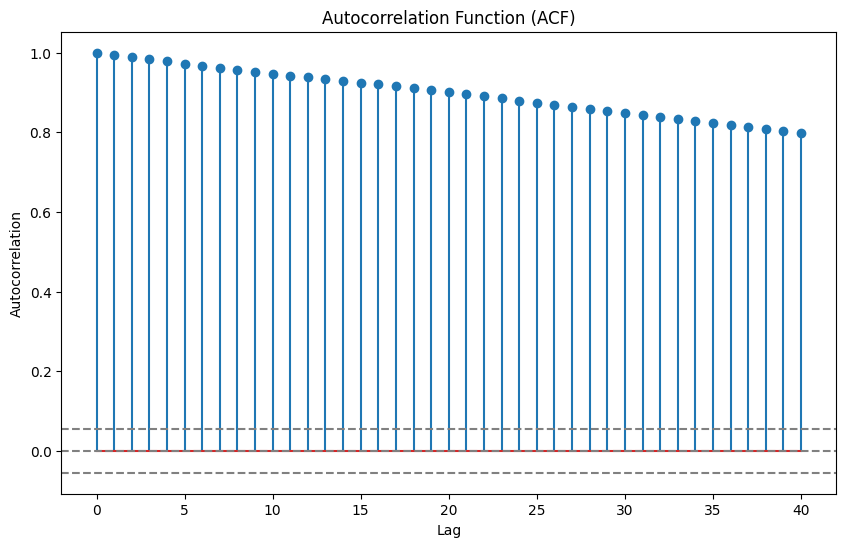

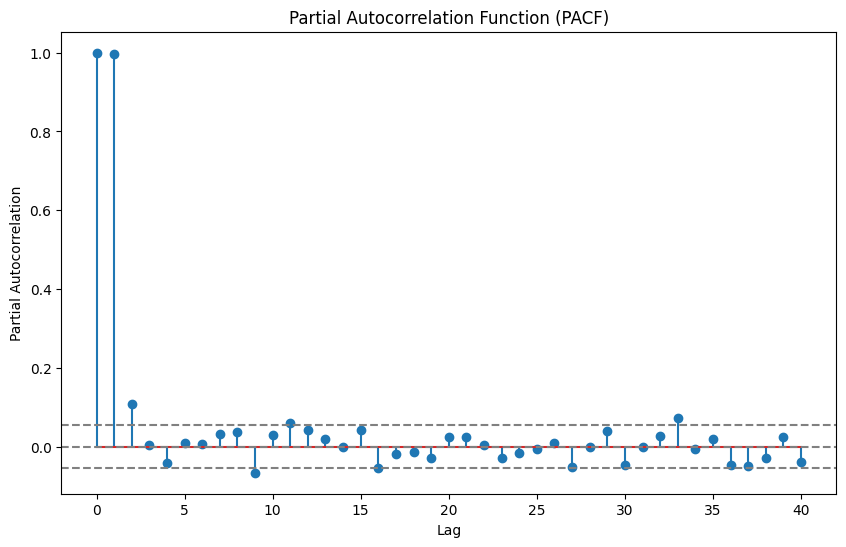

In [13]:
# Memuat data dari file CSV (gantilah 'nama_file.csv' dengan nama file yang sesuai)
file_path = '/content/BBCA.JK22222.csv'
data = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date', dayfirst=True)

# Memastikan bahwa data berada dalam rentang waktu yang diinginkan (2018 - 2022)
train_data = data['2018-01-01':'2022-12-31']

# Menghitung ACF dan PACF
lag_acf = acf(train_data['Close'], nlags=40)
lag_pacf = pacf(train_data['Close'], nlags=40, method='ols')

# Membuat plot ACF
plt.figure(figsize=(10, 6))
plt.stem(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_data)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_data)), linestyle='--', color='gray')
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

# Membuat plot PACF
plt.figure(figsize=(10, 6))
plt.stem(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_data)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_data)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

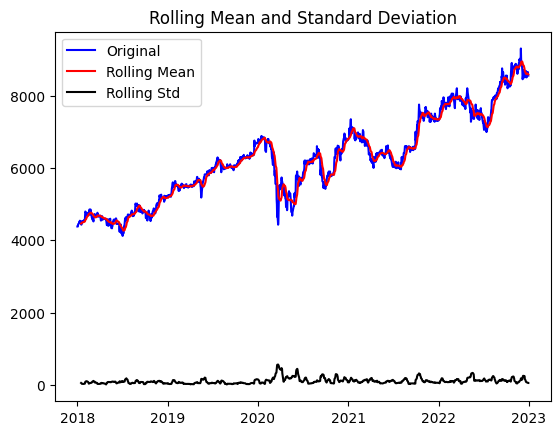

Results of dickey fuller test
Test Statistics                  -1.038614
p-value                           0.738922
No. of lags used                  1.000000
Number of observations used    1252.000000
critical value (1%)              -3.435584
critical value (5%)              -2.863851
critical value (10%)             -2.568001
dtype: float64


In [14]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    y = data['Close']
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
test_stationarity(y)

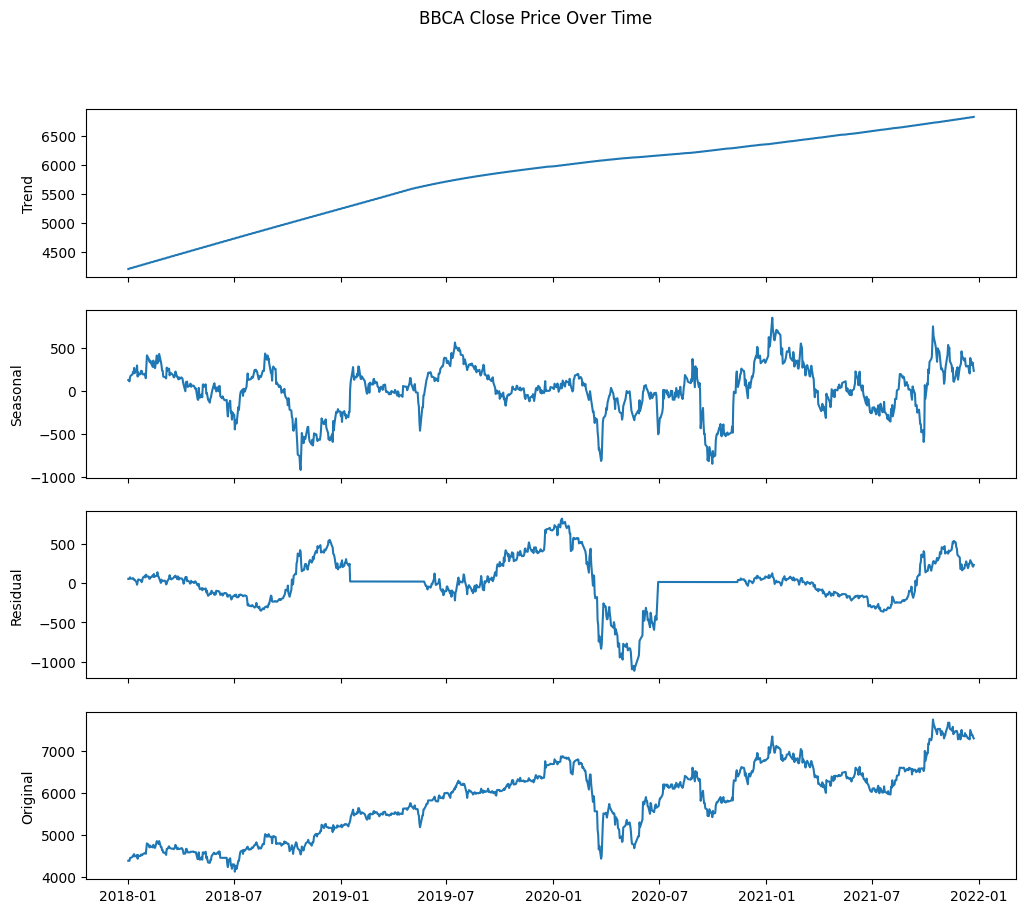

In [15]:
# Assuming you have loaded your data into a DataFrame named 'data'
# and it has a column named 'Date' and 'Close'
# Baca data dari file CSV dan ubah format tanggal
file_path = '/content/BBCA.JK22222.csv'
data = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')
train_size = int(len(data) * 0.8)
train = data[:train_size].copy()  # Create a copy to avoid modifying the original data



# BBCA dekomposisi dengan priode spesifik
bbca_result = sm.tsa.STL(train['Close'], period=365).fit()

# Plot the results of STL Decomposition
fig, axes = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

# Plotting the components manually
axes[0].plot(bbca_result.trend)
axes[0].set_ylabel('Trend')

axes[1].plot(bbca_result.seasonal)
axes[1].set_ylabel('Seasonal')

axes[2].plot(bbca_result.resid)
axes[2].set_ylabel('Residual')

axes[3].plot(train['Close'])
axes[3].set_ylabel('Original')

# Add title and labels
plt.suptitle('BBCA Close Price Over Time')
plt.show()
# print(train.columns)


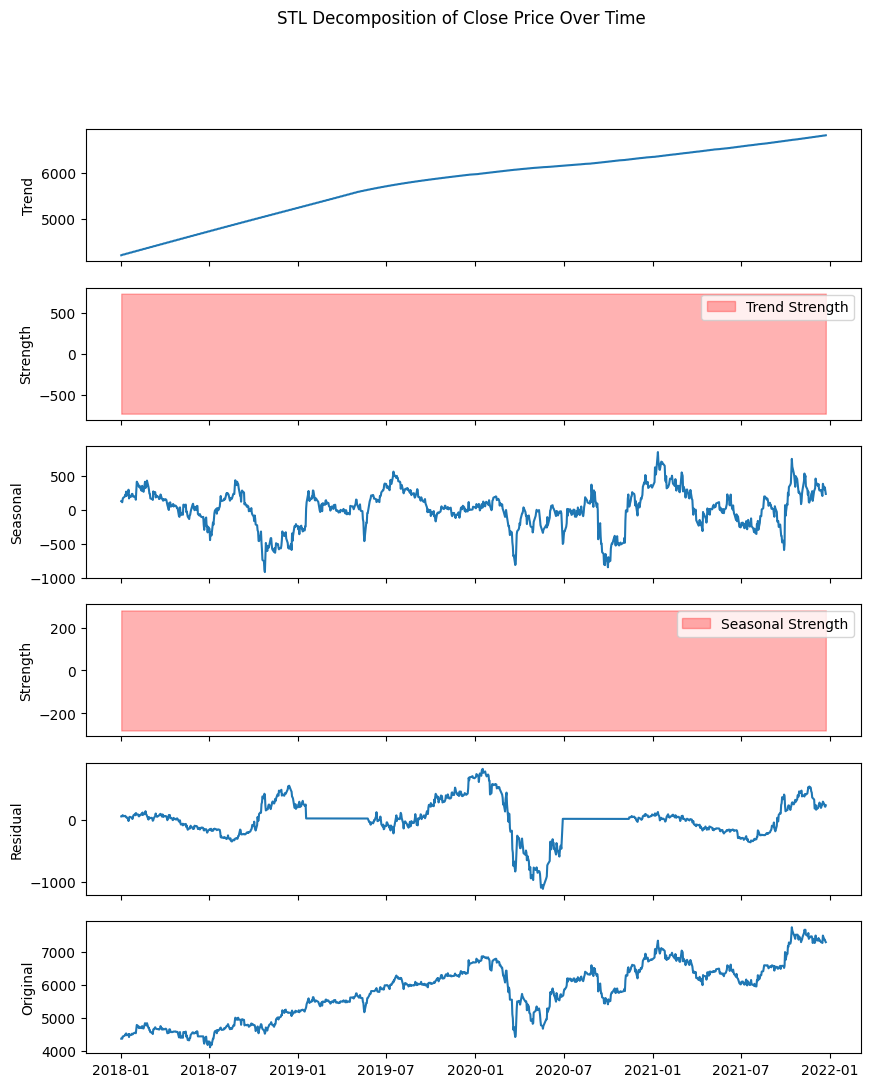

Trend Strength: 100.00%
Seasonal Strength: 30.41%


In [16]:
# STL Decomposition with specified period
bbca_result = sm.tsa.STL(train['Close'], period=365).fit()

# Calculate standard deviations for trend and seasonal components
trend_std = bbca_result.trend.std()
seasonal_std = bbca_result.seasonal.std()

# Calculate the trend strength (percentage of points outside the trend_std)
trend_strength = (abs(bbca_result.trend) > trend_std).mean() * 100

# Calculate the seasonal strength (percentage of points outside the seasonal_std)
seasonal_strength = (abs(bbca_result.seasonal) > seasonal_std).mean() * 100

# Plot hasil STL Decomposition
fig, axes = plt.subplots(6, 1, figsize=(10, 12), sharex=True)

# Plotting the components manually
axes[0].plot(bbca_result.trend)
axes[0].set_ylabel('Trend')

axes[1].fill_between(bbca_result.trend.index, -trend_std, trend_std, color='r', alpha=0.3, label='Trend Strength')
axes[1].legend()
axes[1].set_ylabel('Strength')

axes[2].plot(bbca_result.seasonal)
axes[2].set_ylabel('Seasonal')

axes[3].fill_between(bbca_result.seasonal.index, -seasonal_std, seasonal_std, color='r', alpha=0.3, label='Seasonal Strength')
axes[3].legend()
axes[3].set_ylabel('Strength')

axes[4].plot(bbca_result.resid)
axes[4].set_ylabel('Residual')

axes[5].plot(train['Close'])
axes[5].set_ylabel('Original')

# Menambahkan judul dan label
plt.suptitle('STL Decomposition of Close Price Over Time')
plt.show()

# Print trend strength and seasonal strength
print(f'Trend Strength: {trend_strength:.2f}%')
print(f'Seasonal Strength: {seasonal_strength:.2f}%')

In [17]:
# reset index
train = train.reset_index()

In [18]:
# cek informasi data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1003 non-null   datetime64[ns]
 1   Close   1003 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 15.8 KB


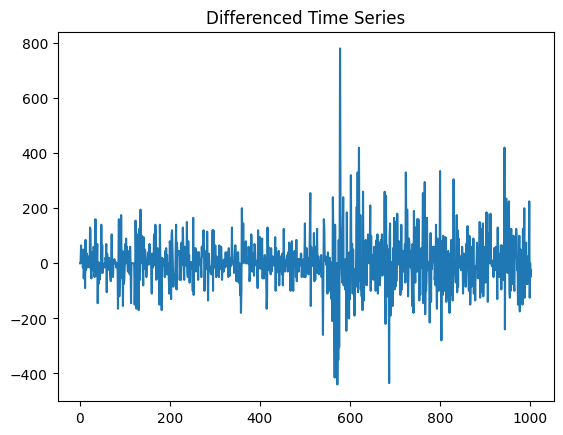

In [19]:
# Differencing data
train_diff = train['Close'].diff().dropna()

# melakuikan plot setelah melakukan differencing
plt.plot(train_diff.index, train_diff, label='Differenced')
plt.title('Differenced Time Series')
plt.show()

In [20]:
# cek stationarity kembali pasca melakukan differencing
def test_stationarity(timeseries):
    # Perform Dickey-Fuller test:
    result = adfuller(timeseries)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])

    if result[1] <= 0.05:
        print("Stationary (p-value <= 0.05)")
    else:
        print("Non-Stationary (p-value > 0.05)")

    # cek stationarity kembali pasca melakukan differencing
test_stationarity(train_diff)

print('data sudah statisoneries karena data awal sudah statisioneries')

ADF Statistic: -17.659829613411734
p-value: 3.6865938991247215e-30
Critical Values: {'1%': -3.4369127451400474, '5%': -2.864437475834273, '10%': -2.568312754566378}
Stationary (p-value <= 0.05)
data sudah statisoneries karena data awal sudah statisioneries


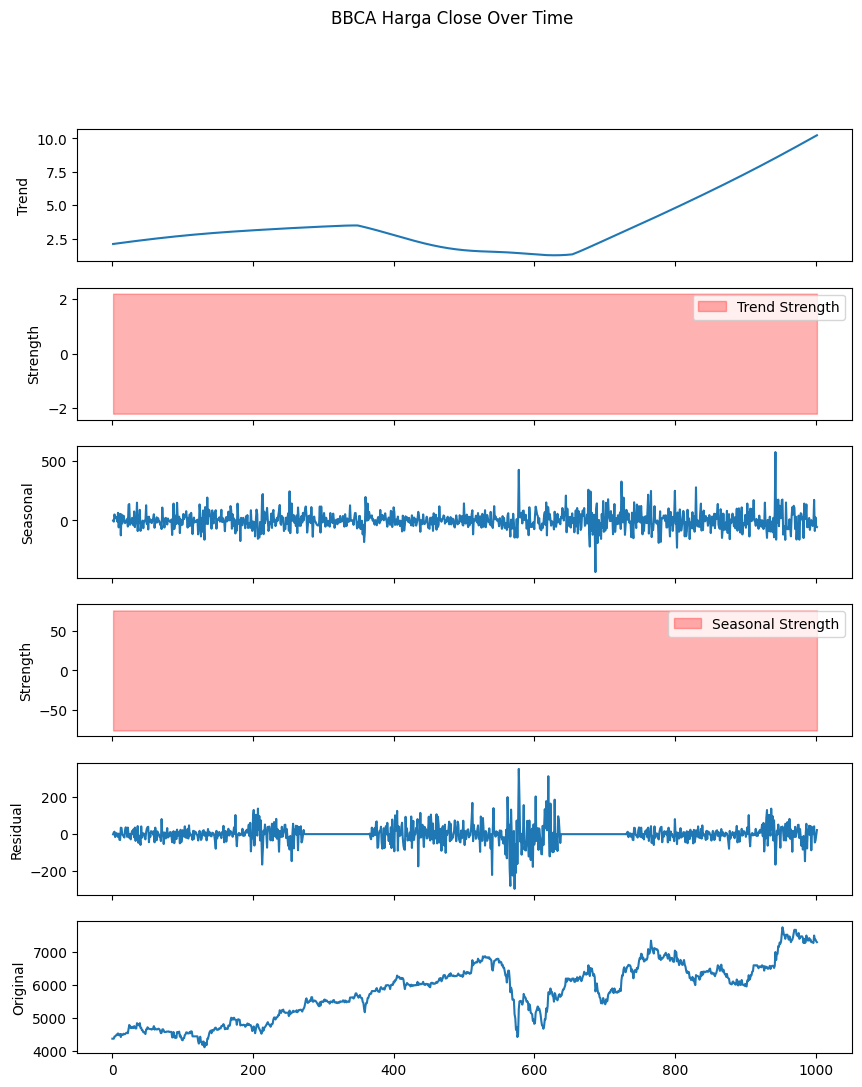

Trend Strength: 72.85%
Seasonal Strength: 23.85%


In [21]:


# STL Decomposition with specified period
bbca_result = sm.tsa.STL(train_diff, period=365).fit()

# Calculate standard deviations for trend and seasonal components
trend_std = bbca_result.trend.std()
seasonal_std = bbca_result.seasonal.std()

# Calculate the trend strength (percentage of points outside the trend_std)
trend_strength = (abs(bbca_result.trend) > trend_std).mean() * 100

# Calculate the seasonal strength (percentage of points outside the seasonal_std)
seasonal_strength = (abs(bbca_result.seasonal) > seasonal_std).mean() * 100

# Plot hasil STL Decomposition
fig, axes = plt.subplots(6, 1, figsize=(10, 12), sharex=True)

# Plotting the components manually
axes[0].plot(bbca_result.trend)
axes[0].set_ylabel('Trend')

axes[1].fill_between(bbca_result.trend.index, -trend_std, trend_std, color='r', alpha=0.3, label='Trend Strength')
axes[1].legend()
axes[1].set_ylabel('Strength')

axes[2].plot(bbca_result.seasonal)
axes[2].set_ylabel('Seasonal')

axes[3].fill_between(bbca_result.seasonal.index, -seasonal_std, seasonal_std, color='r', alpha=0.3, label='Seasonal Strength')
axes[3].legend()
axes[3].set_ylabel('Strength')

axes[4].plot(bbca_result.resid)
axes[4].set_ylabel('Residual')

axes[5].plot(train['Close'])
axes[5].set_ylabel('Original')

# Menambahkan judul dan label
plt.suptitle('BBCA Harga Close Over Time')
plt.show()

# Print trend strength and seasonal strength
print(f'Trend Strength: {trend_strength:.2f}%')
print(f'Seasonal Strength: {seasonal_strength:.2f}%')